# Analyzing the COVID-19 impact for New York City restorans and unemployment rate

## Applied Data Science Capstone Project, September 2020, Anna Zhukova

### Introduction

New York City is the biggest city of the U.S. with an estimated population of 8,336,817 in 2019 distributed over about 302.6 square miles (784 km2), New York City is also the most densely populated major city in the United States. NYC is attracting thousands of people for tourism and living every year. In 2019 it brought in about $45 billion in annual spending and supported about 300,000 jobs.

NYC is a bright vibrant city, where you can try cuisines from all over the world. Number of restaurants in 2018 in this city was 27043, but the total number of eating and drinking places was more than 50k. In 2019 Food Services provided 865,800 jobs and covered 9% of the employment in NYC. One hundred and twenty six of NYC's restaurants have been awarded Michelin stars. There are also nine NYC restaurants that made it onto the World's 100 Best Restaurants list.

Officials had been expecting more than 67 million visitors in 2020, about one-fifth of them from outside the country. But the COVID-19 pandemic happened in March 2020. All World had already suffered from the pandemic. NYC was an epicenter in the U.S. in spring 2020 and had a strong damage from COVID-19. Let’s try to find details and to do analysis of its impact on NYC.

- ???who would be interested in this project.

### Data Collection 

The data required for this project is as follows has been collected from multiple sources. 
The following data is required for the project: 
1. Neighborhood data of NYC (borough, neighborhood, geographical coordinates)
2. COVID-19 data in NYC
3. Unemployment rate Data
4. Venue data for neighborhoods in NYC Neighborhoods

#### Neighborhoods Data 
The data of the neighborhoods in NYC was taken from an open json file https://cocl.us/new_york_dataset . The data is added into a pandas dataframe. The geocoder library in python has been used to obtain latitude and longitude data for various neighborhoods in NYC. This data is relevant for plotting the map of NYC using the Folium library in python. 
#### COVID-19 Data
It is open data on site with John Hopkins reported cases for all US: https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics I will take only data for NYC.
#### Unemployment rate Data
Statistics per month is available on site: 
https://www.bls.gov/regions/new-york-new-jersey/data/xg-tables/ro2xglausnyc.htm
#### Venue Data 
The venue data has been extracted using the Foursquare API. This data contains venue lists, recommendations for all neighborhoods in NYC and is used to check the popular venues of different neighborhoods.



In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from bs4 import BeautifulSoup

import json # library to handle JSON files

#!pip install geocoder
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [6]:
neighborhoods_data = newyork_data['features']

In [4]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
address = 'New York City, NY'
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [9]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [10]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [11]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [12]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### Define Foursquare Credentials and Version

In [168]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = ''
VERSION = '20200927' # Foursquare API version

In [14]:
manhattan_data.head(20)

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


Let's take Midtown neighborhood for our research.

In [15]:
manhattan_data.loc[15, 'Neighborhood']

'Midtown'

In [16]:
neighborhood_latitude = manhattan_data.loc[15, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[15, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[15, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Midtown are 40.75469110270623, -73.98166882730304.


#### Now, let's get the top 100 venues that are in Midtown within a radius of 500 meters.
First, let's create the GET request URL.

In [17]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=ICGNW1NIQDTCZAFXCOO4ANPEOOB3JGRCETETNWHDFRJGVDOL&client_secret=0XNGJZYSLDFGJCJWR0X50NSSTVRV3O5PPHK5WPFYZVCFUPOD&v=20200927&ll=40.75469110270623,-73.98166882730304&radius=500&limit=100'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f70bab7c36715438e5aedad'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Midtown East',
  'headerFullLocation': 'Midtown East, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 185,
  'suggestedBounds': {'ne': {'lat': 40.759191107206235,
    'lng': -73.97573940939031},
   'sw': {'lat': 40.75019109820623, 'lng': -73.98759824521576}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '3fd66200f964a520d7f11ee3',
       'name': 'Bryant Park',
       'location': {'address': 'E 42nd St',
        'crossStreet': 'btwn 5th & 6th Ave',
        'lat': 40.753621,
        'lng': -73.983265,
  

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,id,name,categories,lat,lng
0,3fd66200f964a520d7f11ee3,Bryant Park,Park,40.753621,-73.983265
1,4ddaf97b183802d5373be2eb,New York Public Library Terrace,Plaza,40.753017,-73.981480
2,4b0ff732f964a520d26623e3,Nat Sherman Townhouse,Smoke Shop,40.753283,-73.980358
3,59c0b9fa0d173f674fadfaac,sweetgreen,Salad Place,40.754640,-73.983102
4,5b9fe1ef93bd63002c3bbb7b,CAVA,Mediterranean Restaurant,40.754186,-73.981913
5,4bf7cc80c07c9c7488b5bbef,Joanna Vargas Skin Care,Spa,40.753136,-73.980721
6,5626c1bd498e3b91b42d5511,COS,Clothing Store,40.753678,-73.980686
7,4ce5648a5fce5481ba5e5baa,Sophie's Cuban Cuisine,Cuban Restaurant,40.755927,-73.980598
8,50734f10e4b01efe2a1766ca,Strip House,Steakhouse,40.755298,-73.980690
9,5866f5c30b7e937108ec2adb,Whole Foods Market,Grocery Store,40.754507,-73.984299


In [148]:
food_service_data = nearby_venues[nearby_venues['categories'].str.contains(' Restaurant|Steakhouse')].reset_index(drop=True)

In [149]:
food_service_data.head(30)

,id,name,categories,lat,lng
0,5b9fe1ef93bd63002c3bbb7b,CAVA,Mediterranean Restaurant,40.754186,-73.981913
1,4ce5648a5fce5481ba5e5baa,Sophie's Cuban Cuisine,Cuban Restaurant,40.755927,-73.980598
2,50734f10e4b01efe2a1766ca,Strip House,Steakhouse,40.755298,-73.980690
3,5552087d498eb30c149f785a,Gabriel Kreuther,French Restaurant,40.754143,-73.983505
4,5a7e4674da2e00425ee2921d,Málà Project,Szechuan Restaurant,40.756850,-73.980855
5,5e024619523cd2000769f67a,Xi’an Famous Foods,Chinese Restaurant,40.754969,-73.982497
6,4249ec00f964a52093201fe3,Koi New York,Sushi Restaurant,40.752755,-73.983304
7,5d9629652e04ea000834556a,Joju,Vietnamese Restaurant,40.755840,-73.978750
8,51a7b5f2498ec2294861016c,Tommy Bahama Restaurant,Hawaiian Restaurant,40.755425,-73.979198
9,573de0a0498e3e5fd869301b,Sushi Ginza Onodera,Sushi Restaurant,40.752472,-73.981792


In [150]:
food_service_data.shape

(22, 5)

As we can see, 25% of venues' results are restaurants. Now I will find information about restaurants: their ratings and amount of likes from visitors.

In [151]:
food_service_data.insert(5, 'rating', 0)

In [152]:
food_service_data.insert(6, 'likes', 0)

In [153]:
for index, row in food_service_data.iterrows():
    url1 = 'https://api.foursquare.com/v2/venues/{}?v={}&oauth_token={}'.format(
    row['id'], 
    VERSION,
    ACCESS_TOKEN
    )
    results_stats = requests.get(url1).json()
    food_service_data.iloc[index, 5] = results_stats['response']['venue']['rating']
    food_service_data.iloc[index, 6] = results_stats['response']['venue']['likes']['count']

In [154]:
food_service_data

,id,name,categories,lat,lng,rating,likes
0,5b9fe1ef93bd63002c3bbb7b,CAVA,Mediterranean Restaurant,40.754186,-73.981913,8.9,41
1,4ce5648a5fce5481ba5e5baa,Sophie's Cuban Cuisine,Cuban Restaurant,40.755927,-73.980598,8.8,187
2,50734f10e4b01efe2a1766ca,Strip House,Steakhouse,40.755298,-73.980690,8.6,218
3,5552087d498eb30c149f785a,Gabriel Kreuther,French Restaurant,40.754143,-73.983505,8.6,154
4,5a7e4674da2e00425ee2921d,Málà Project,Szechuan Restaurant,40.756850,-73.980855,9.0,146
5,5e024619523cd2000769f67a,Xi’an Famous Foods,Chinese Restaurant,40.754969,-73.982497,8.2,5
6,4249ec00f964a52093201fe3,Koi New York,Sushi Restaurant,40.752755,-73.983304,8.5,347
7,5d9629652e04ea000834556a,Joju,Vietnamese Restaurant,40.755840,-73.978750,8.4,23
8,51a7b5f2498ec2294861016c,Tommy Bahama Restaurant,Hawaiian Restaurant,40.755425,-73.979198,8.0,210
9,573de0a0498e3e5fd869301b,Sushi Ginza Onodera,Sushi Restaurant,40.752472,-73.981792,8.1,45


In [155]:
address = 'Midtown South, Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Midtown are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Midtown are 40.7498417, -73.984251.


Here is all restaurants on the map

In [157]:
# create map of Midtown using latitude and longitude values
map_midtown = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(food_service_data['lat'], food_service_data['lng'], food_service_data['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_midtown)  
    
map_midtown

In [158]:
pd.to_numeric(food_service_data['rating'])

0     8.9
1     8.8
2     8.6
3     8.6
4     9.0
5     8.2
6     8.5
7     8.4
8     8.0
9     8.1
10    8.0
11    8.3
12    8.3
13    7.5
14    8.8
15    8.6
16    8.9
17    8.7
18    8.3
19    8.3
20    8.4
21    9.1
Name: rating, dtype: float64

In [166]:
food_service_data.sort_values(by=['rating'], ascending=False).reset_index().head()

,index,id,name,categories,lat,lng,rating,likes
0,21,595ebd0aee712007dc5ae215,Sushi By Bou,Sushi Restaurant,40.758679,-73.983045,9.1,83
1,4,5a7e4674da2e00425ee2921d,Málà Project,Szechuan Restaurant,40.756850,-73.980855,9.0,146
2,16,5890c970cc5b6a43d6bf01a0,Omar's Mediterranean Cuisine,Mediterranean Restaurant,40.750943,-73.981020,8.9,61
3,0,5b9fe1ef93bd63002c3bbb7b,CAVA,Mediterranean Restaurant,40.754186,-73.981913,8.9,41
4,1,4ce5648a5fce5481ba5e5baa,Sophie's Cuban Cuisine,Cuban Restaurant,40.755927,-73.980598,8.8,187


I checked all results in Google.maps. Almost all restaurants are still working but some of them temprorary closed (**"Ikinari Steak"**, **Tony's Di Napoli**, **Sushi By Bou**, **Koi New York**) or closed forever. A lot of places haven't possibility of eating inside restaurant, only take away option. Only in Gabriel Kreuther, STK Steakhouse Midtown NYC and Strip House you still can reserve a table on a terrasse and enjoy your meal in restaurant.
If we check table reservation for Gabriel Kreuther restaurant for Sat 26th of September, there are no free tables for whole day. But when I checked  this restaurant for information **hereNow** it was 0. I think feature of checking yourself in Foursquare app is out of using these days.

### COVID-19 statistics

In [21]:
covid_us_new_york = pd.read_csv('https://raw.githubusercontent.com/annzhukova/Coursera_Capstone/master/covid_us_new_york.csv')

In [167]:
covid_us_new_york.tail()

,fips,county,state,lat,long,date,cases,state_code,deaths
225,36061,New York,New York,40.767273,-73.971526,2020-09-03,32251,NY,3170
226,36061,New York,New York,40.767273,-73.971526,2020-09-04,32310,NY,3172
227,36061,New York,New York,40.767273,-73.971526,2020-09-05,32372,NY,3172
228,36061,New York,New York,40.767273,-73.971526,2020-09-06,32426,NY,3172
229,36061,New York,New York,40.767273,-73.971526,2020-09-07,32442,NY,3173


### Unemployment rate data
For this section I use BeautifulSoup for scraping html tables with unemployment rate data from the official webpage. 


In [25]:
request = requests.get('https://www.bls.gov/regions/new-york-new-jersey/data/xg-tables/ro2xglausnyc.htm#ro2xglausnyc4.f.p')
soup = BeautifulSoup(request.content, 'lxml')
table = soup.find_all('table')[3]
df = pd.read_html(str(table))
df

[                         Year                        Jan  \
 0                        2010                       10.1   
 1                        2011                        8.9   
 2                        2012                        9.6   
 3                        2013                        9.0   
 4                        2014                        8.1   
 5                        2015                        6.4   
 6                        2016                        5.3   
 7                        2017                        4.8   
 8                        2018                        4.4   
 9                        2019                        4.3   
 10                       2020                        3.5   
 11  Footnotes (p) Preliminary  Footnotes (p) Preliminary   
 
                           Feb                        Mar  \
 0                        10.0                        9.9   
 1                         8.9                        8.8   
 2                    

In [31]:
df_unemployment_rate = pd.DataFrame(df[0])

In [32]:
df_unemployment_rate = df_unemployment_rate.head(11)
df_unemployment_rate

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg
0,2010,10.1,10.0,9.9,9.8,9.6,9.5,9.4,9.3,9.3,9.2,9.2,9.1,NaN
1,2011,8.9,8.9,8.8,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.5,NaN
2,2012,9.6,9.6,9.6,9.6,9.6,9.5,9.4,9.2,9.1,9.1,9.0,9.0,NaN
3,2013,9.0,9.0,9.0,8.9,8.9,8.9,9.0,8.9,8.8,8.7,8.5,8.3,NaN
4,2014,8.1,8.0,7.8,7.7,7.5,7.3,7.1,6.9,6.8,6.7,6.6,6.5,NaN
5,2015,6.4,6.3,6.2,6.0,5.8,5.6,5.4,5.3,5.2,5.2,5.3,5.3,NaN
6,2016,5.3,5.3,5.2,5.2,5.2,5.2,5.3,5.3,5.3,5.2,5.1,4.9,NaN
7,2017,4.8,4.7,4.6,4.6,4.7,4.7,4.7,4.7,4.6,4.6,4.5,4.4,NaN
8,2018,4.4,4.3,4.3,4.3,4.2,4.1,4.1,4.0,4.1,4.1,4.2,4.3,NaN
9,2019,4.3,4.3,4.3,4.2,4.1,4.0,3.9,3.8,3.7,3.6,3.6,3.6,NaN


Now I will do general data frame for COVID cases, deaths and unemployment rate. Data with only 8 months is really small data for statistic but anyway let's find it. For cases and deaths per month I will take difference between last days on neighbouring months. Fast way only for 8 months do it manual.

In [86]:
# define the dataframe columns
col_names = ['cases', 'deaths', 'unemployment_rate'] 

# instantiate the dataframe
covid_main = pd.DataFrame(columns=col_names)

covid_main

,cases,deaths,unemployment_rate


In [87]:
covid_main = covid_main.append({'cases': 0,
                   'deaths': 0,
                   'unemployment_rate': df_unemployment_rate.iloc[10, 1]}, ignore_index=True)

In [88]:
covid_main = covid_main.append({'cases': covid_us_new_york.iloc[38, 6] - covid_us_new_york.iloc[9, 6],
                   'deaths': covid_us_new_york.iloc[38, 8] - covid_us_new_york.iloc[9, 8],
                   'unemployment_rate': df_unemployment_rate.iloc[10, 2]}, ignore_index=True)

In [89]:
covid_main = covid_main.append({'cases': covid_us_new_york.iloc[69, 6] - covid_us_new_york.iloc[38, 6],
                   'deaths': covid_us_new_york.iloc[69, 8] - covid_us_new_york.iloc[38, 8],
                   'unemployment_rate': df_unemployment_rate.iloc[10, 3]}, ignore_index=True)

In [90]:
covid_main = covid_main.append({'cases': covid_us_new_york.iloc[99, 6] - covid_us_new_york.iloc[69, 6],
                   'deaths': covid_us_new_york.iloc[99, 8] - covid_us_new_york.iloc[69, 8],
                   'unemployment_rate': df_unemployment_rate.iloc[10, 4]}, ignore_index=True)

In [91]:
covid_main = covid_main.append({'cases': covid_us_new_york.iloc[130, 6] - covid_us_new_york.iloc[99, 6],
                   'deaths': covid_us_new_york.iloc[130, 8] - covid_us_new_york.iloc[99, 8],
                   'unemployment_rate': df_unemployment_rate.iloc[10, 5]}, ignore_index=True)

In [92]:
covid_main = covid_main.append({'cases': covid_us_new_york.iloc[160, 6] - covid_us_new_york.iloc[130, 6],
                   'deaths': covid_us_new_york.iloc[160, 8] - covid_us_new_york.iloc[130, 8],
                   'unemployment_rate': df_unemployment_rate.iloc[10, 6]}, ignore_index=True)

In [93]:
covid_main = covid_main.append({'cases': covid_us_new_york.iloc[191, 6] - covid_us_new_york.iloc[160, 6],
                   'deaths': covid_us_new_york.iloc[191, 8] - covid_us_new_york.iloc[160, 8],
                   'unemployment_rate': df_unemployment_rate.iloc[10, 7]}, ignore_index=True)

In [94]:
covid_main = covid_main.append({'cases': covid_us_new_york.iloc[222, 6] - covid_us_new_york.iloc[191, 6],
                   'deaths': covid_us_new_york.iloc[222, 8] - covid_us_new_york.iloc[191, 8],
                   'unemployment_rate': df_unemployment_rate.iloc[10, 8].replace('(p)', '')}, ignore_index=True)

In [95]:
covid_main

,cases,deaths,unemployment_rate
0,0,0,3.5
1,0,0,3.4
2,6876,292,4.1
3,15044,1626,15.0
4,4733,1019,18.3
5,1794,142,20.3
6,2011,65,19.9
7,1661,26,16.0


In [96]:
covid_main['month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug']

In [114]:
covid_main.set_index('month', inplace=True)

In [98]:
covid_main

,cases,deaths,unemployment_rate
month,,,
Jan,0,0,3.5
Feb,0,0,3.4
Mar,6876,292,4.1
Apr,15044,1626,15.0
May,4733,1019,18.3
Jun,1794,142,20.3
Jul,2011,65,19.9
Aug,1661,26,16.0


In [108]:
import matplotlib.pyplot as plt

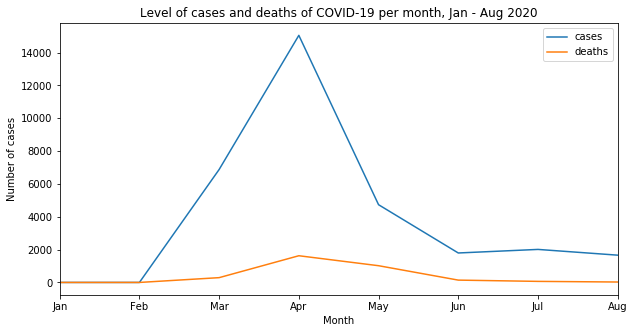

In [144]:
#cases.index = covid_main.index.map(int) # let's change the index values to type integer for plotting
covid_main.plot(figsize=(10,5))

plt.title('Level of cases and deaths of COVID-19 per month, Jan - Aug 2020')

plt.ylabel('Number of cases')
plt.xlabel('Month')

plt.show()

In [139]:
unemployment_rate_plot = pd.to_numeric(covid_main['unemployment_rate'])
unemployment_rate_plot = pd.DataFrame(unemployment_rate_plot)

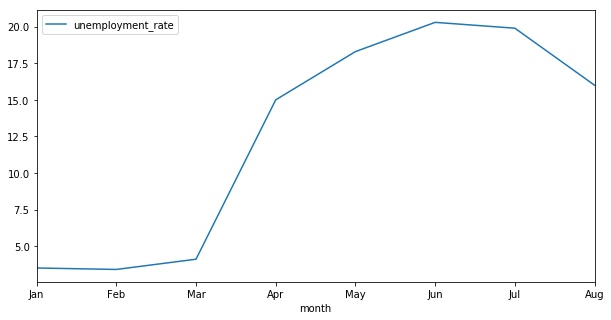

In [145]:
unemployment_rate_plot.plot(figsize=(10,5))

So we can see that the unemployment rate goes with tardiness after the first wave of COVID in April and also has a slow trend for decreasing because of fear of the next wave and almost full absence of tourists.